<a href="https://colab.research.google.com/github/idrisoracleng/DataScience/blob/main/Yusuf0494_FinalProject_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TAKE NOTE TO USE TRAINING DATA SET TO GET AVERAGE

ALSO TAKE NOTE TO SAVE MODEL HISTORY IMMEDIATELY AFTER TRAINING BEFORE RUNNING ANYTHING

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Fri Dec 15 03:08:31 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla V100-SXM2-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0              24W / 300W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
from google.colab import drive
drive.mount('/content/GoogleDrive')

Mounted at /content/GoogleDrive


In [6]:
data_dir = '/content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data'

In [8]:
os.listdir(data_dir)


['training', 'validation', 'test']

In [9]:
test_path=data_dir+'/test/'
train_path=data_dir+'/training/'
val_path=data_dir+'/validation/'


In [10]:
os.listdir(val_path)


['donuts', 'onion_rings', 'pizza', 'spring_rolls', 'steak']

In [11]:
os.listdir(train_path)

['onion_rings', 'donuts', 'pizza', 'spring_rolls', 'steak']

In [12]:
###Training Sets

train_onion_rings_img_list = os.listdir(train_path +'onion_rings')
train_donuts_img_list = os.listdir(train_path +'donuts')
train_pizza_img_list = os.listdir(train_path +'pizza')
train_spring_rollsg_img_list = os.listdir(train_path +'spring_rolls')
train_steak_img_list = os.listdir(train_path +'steak')

###Validation Sets

val_onion_rings_img_list = os.listdir(val_path +'onion_rings')
val_donuts_img_list = os.listdir(val_path +'donuts')
val_pizza_img_list = os.listdir(val_path +'pizza')
val_spring_rollsg_img_list = os.listdir(val_path +'spring_rolls')
val_steak_img_list = os.listdir(val_path +'steak')


###Test Sets

test_onion_rings_img_list = os.listdir(test_path +'onion_rings')
test_donuts_img_list = os.listdir(test_path +'donuts')
test_pizza_img_list = os.listdir(test_path +'pizza')
test_spring_rollsg_img_list = os.listdir(test_path +'spring_rolls')
test_steak_img_list = os.listdir(test_path +'steak')



In [13]:
print("############# Training Set Data#################")
print('Training Set Onion Rings', len(train_onion_rings_img_list), "images")
print('Training Set Pizza', len(train_pizza_img_list), "images")
print('Training Set Steak', len(train_steak_img_list), "images")

print("############# Validation Set Data#################")
print('Validation Set Onion Rings', len(val_onion_rings_img_list), "images")
print('Validation Set Pizza', len(val_pizza_img_list), "images")
print('Validation Set Steak', len(val_steak_img_list), "images")

print("############# Test Set Data#################")
print('Test Set Onion Rings', len(test_onion_rings_img_list), "images")
print('Test Set Pizza', len(test_pizza_img_list), "images")
print('Test Set Steak', len(test_steak_img_list), "images")

############# Training Set Data#################
Training Set Onion Rings 700 images
Training Set Pizza 700 images
Training Set Steak 701 images
############# Validation Set Data#################
Validation Set Onion Rings 200 images
Validation Set Pizza 200 images
Validation Set Steak 200 images
############# Test Set Data#################
Test Set Onion Rings 100 images
Test Set Pizza 100 images
Test Set Steak 100 images


In [14]:
#test_onion_rings_img_list
test_onion_rings_img_list[0]

'1126429.jpg'

In [15]:
train_steak_img_list[0]

'1313316.jpg'

In [16]:
test_path

'/content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data/test/'

In [17]:
test_onion_rings_food   = test_path+'onion_rings/'+test_onion_rings_img_list[0]
test_pizza_food         = test_path+'pizza/'+ test_pizza_img_list[0]
test_steak_food         = test_path+'steak/' + test_steak_img_list[0]
test_spring_rollsg_food = test_path+'springs_rollsg/'+test_spring_rollsg_img_list[0]
test_spring_rollsg_food

'/content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data/test/springs_rollsg/508363.jpg'

In [18]:
test_onion_rings_img_list[0]

'1126429.jpg'

In [19]:
print(test_onion_rings_food)

/content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data/test/onion_rings/1126429.jpg


In [20]:
test_onion_rings_food

'/content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data/test/onion_rings/1126429.jpg'

In [21]:
imread(test_onion_rings_food)

array([[[  4,   4,   4],
        [  4,   4,   4],
        [  3,   3,   3],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[  4,   4,   4],
        [  4,   4,   4],
        [  3,   3,   3],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       [[  4,   4,   4],
        [  4,   4,   4],
        [  3,   3,   3],
        ...,
        [  3,   3,   3],
        [  3,   3,   3],
        [  3,   3,   3]],

       ...,

       [[166, 167, 153],
        [167, 168, 154],
        [169, 170, 156],
        ...,
        [194, 191, 172],
        [194, 191, 172],
        [193, 190, 171]],

       [[165, 165, 153],
        [167, 167, 155],
        [168, 169, 155],
        ...,
        [193, 190, 173],
        [193, 190, 173],
        [193, 190, 173]],

       [[165, 165, 153],
        [167, 167, 155],
        [168, 169, 155],
        ...,
        [192, 189, 172],
        [192, 189, 172],
        [192, 189, 172]]

In [22]:
imread(test_onion_rings_food).shape

(512, 384, 3)

In [23]:
test_onion_rings_food_array=imread(test_onion_rings_food)

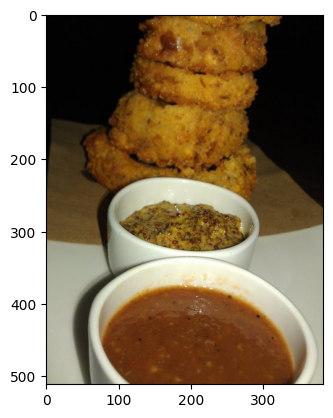

In [24]:
plt.imshow(test_onion_rings_food_array)

In [25]:
train_onion_rings_img_list[0]

'176634.jpg'

In [26]:
train_path

'/content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data/training/'

In [27]:
val_onion_rings_food   = val_path+'onion_rings/'+val_onion_rings_img_list[0]
val_pizza_food         = val_path+'pizza/'+ val_pizza_img_list[0]
val_steak_food         = val_path+'steak/' + val_steak_img_list[0]
val_spring_rollsg_food = val_path+'springs_rollsg/'+val_spring_rollsg_img_list[0]
val_spring_rollsg_food

'/content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data/validation/springs_rollsg/1056128.jpg'

In [29]:
train_onion_rings_food   = train_path+'onion_rings/'+train_onion_rings_img_list[0]
train_pizza_food         = train_path+'pizza/'+ train_pizza_img_list[0]
train_steak_food         = train_path+'steak/' + train_steak_img_list[0]
train_spring_rollsg_food = train_path+'springs_rollsg/'+train_spring_rollsg_img_list[0]
train_spring_rollsg_food
train_steak_food

'/content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data/training/steak/1313316.jpg'

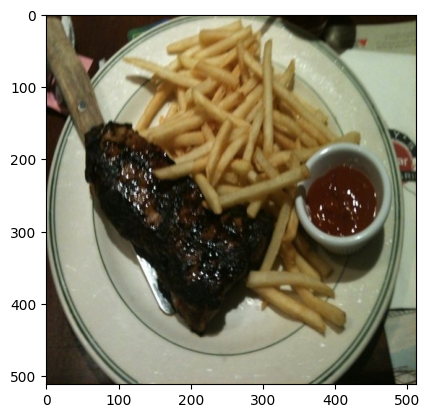

In [30]:
train_steak_img_list.index('1340977.jpg')  #194
train_steak_img_list_bk=train_steak_img_list
plt.imshow(imread(train_path+'steak/' + train_steak_img_list[194]))

TypeError: ignored

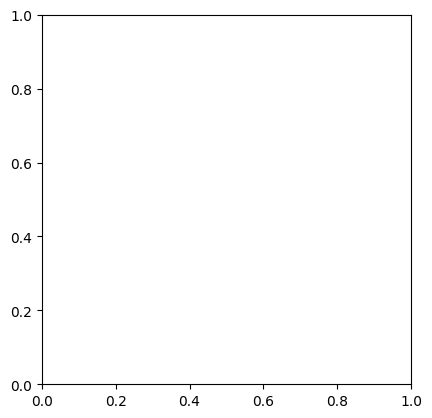

In [28]:
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
#train_steak_img_list[194] = cv2.cvtColor(imread(train_path+'steak/' + train_steak_img_list[194]), cv2.CV_GRAY2RGB )
plt.imshow(train_steak_img_list[194])

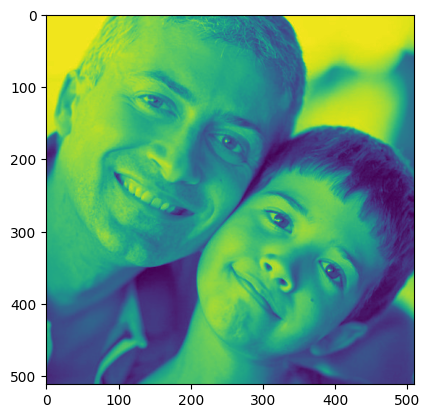

In [31]:
plt.imshow(imread('/content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data/training/steak/1340977.jpg'))

In [32]:
imread(train_onion_rings_food)

array([[[ 11,  28, 100],
        [ 11,  28, 100],
        [ 12,  29, 101],
        ...,
        [ 80,  51,  81],
        [ 78,  52,  81],
        [ 79,  53,  82]],

       [[ 10,  27,  99],
        [ 10,  27,  99],
        [ 11,  28, 100],
        ...,
        [ 73,  47,  76],
        [ 72,  46,  75],
        [ 72,  47,  76]],

       [[  9,  26,  96],
        [ 10,  27,  97],
        [ 11,  28, 100],
        ...,
        [ 65,  42,  71],
        [ 65,  42,  71],
        [ 65,  42,  71]],

       ...,

       [[218, 234, 249],
        [216, 232, 247],
        [216, 232, 248],
        ...,
        [241, 197, 196],
        [232, 191, 185],
        [186, 148, 139]],

       [[218, 234, 249],
        [218, 234, 249],
        [218, 234, 250],
        ...,
        [207, 156, 155],
        [224, 175, 170],
        [197, 150, 142]],

       [[217, 233, 248],
        [218, 234, 249],
        [217, 233, 249],
        ...,
        [168, 114, 114],
        [220, 167, 163],
        [223, 173, 166]]

In [33]:
imread(train_steak_food)

array([[[ 37,   7,   5],
        [ 37,   7,   5],
        [ 37,   7,   5],
        ...,
        [ 61,  52,  55],
        [109,  99, 107],
        [102,  92, 100]],

       [[ 36,   6,   4],
        [ 36,   6,   4],
        [ 36,   6,   4],
        ...,
        [105,  96, 101],
        [124, 114, 122],
        [ 90,  80,  88]],

       [[ 36,   6,   4],
        [ 36,   6,   4],
        [ 36,   6,   4],
        ...,
        [155, 146, 151],
        [130, 120, 128],
        [ 72,  62,  70]],

       ...,

       [[ 54,  15,  10],
        [ 54,  15,  10],
        [ 55,  14,  10],
        ...,
        [222, 224, 221],
        [219, 221, 218],
        [217, 219, 216]],

       [[ 55,  16,  11],
        [ 55,  16,  11],
        [ 55,  16,  11],
        ...,
        [218, 220, 217],
        [215, 217, 214],
        [212, 214, 211]],

       [[ 55,  16,  11],
        [ 55,  16,  11],
        [ 56,  17,  12],
        ...,
        [214, 216, 213],
        [210, 212, 209],
        [207, 209, 206]]

In [34]:
imread(train_steak_food).max()

255

In [35]:
imread(train_onion_rings_food).max()    ###To show if we have to normalize
#imread(train_onion_rings_food).min()

255

In [36]:
#train_steak_food         = train_path+'steak/' + train_steak_img_list[0]
imread(train_steak_food).shape

(384, 512, 3)

This means we have to normalize

In [37]:
imread(train_onion_rings_food).shape

(512, 382, 3)

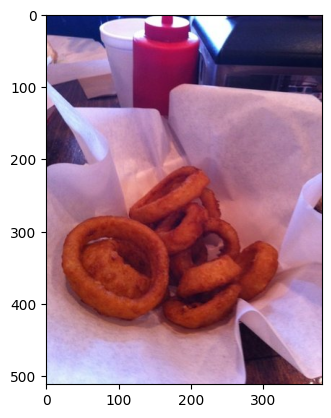

In [38]:
train_onion_rings_food_array=imread(train_onion_rings_food)
plt.imshow(train_onion_rings_food_array)

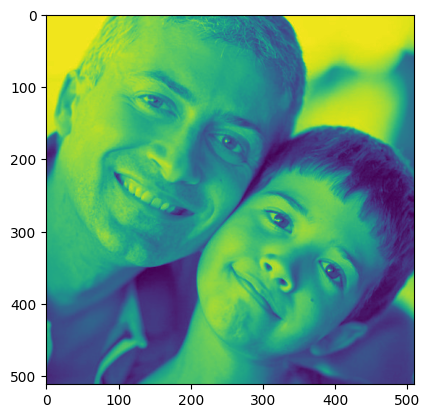

In [39]:
plt.imshow(imread('/content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data/training/steak/1340977.jpg'))

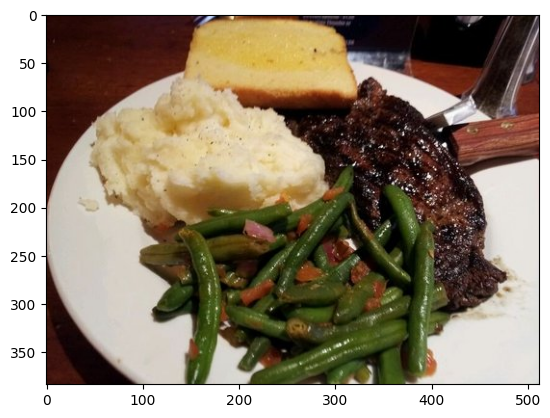

In [40]:
train_steak_food_array=imread(train_steak_food)
plt.imshow(train_steak_food_array)

In [41]:
val_onion_rings_food_array=imread(val_onion_rings_food)

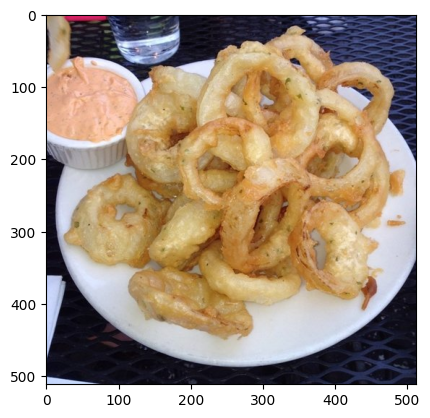

In [42]:
plt.imshow(val_onion_rings_food_array)

In [43]:
train_onion_rings_img_list = os.listdir(train_path +'onion_rings')
train_donuts_img_list = os.listdir(train_path +'donuts')
train_pizza_img_list = os.listdir(train_path +'pizza')
train_spring_rollsg_img_list = os.listdir(train_path +'spring_rolls')
train_steak_img_list = os.listdir(train_path +'steak')

In [44]:
len(train_onion_rings_img_list)

700

In [40]:
img_onion_dim1=[]
img_onion_dim2=[]

for image_filename in train_onion_rings_img_list:
  img_onion=imread(train_path+'onion_rings/'+image_filename)
  d1, d2,colour=img_onion.shape
  img_onion_dim1.append(d1)
  img_onion_dim2.append(d2)



In [41]:
print(np.mean(img_onion_dim1))
print(np.mean(img_onion_dim2))

484.39428571428573
489.30571428571426


In [42]:
img_donuts_dim1=[]
img_donuts_dim2=[]

for image_filename in train_donuts_img_list:
  img_donuts=imread(train_path+'donuts/'+image_filename)
  d1, d2,colour=img_donuts.shape
  img_donuts_dim1.append(d1)
  img_donuts_dim2.append(d2)


In [44]:
print(np.mean(img_donuts_dim1))
print(np.mean(img_donuts_dim2))

472.68142857142857
491.8985714285714


In [33]:
img_pizza_dim1=[]
img_pizza_dim2=[]

for image_filename in train_pizza_img_list:
  img_pizza=imread(train_path+'pizza/'+image_filename)
  d1, d2,colour=img_pizza.shape
  img_pizza_dim1.append(d1)
  img_pizza_dim2.append(d2)

In [34]:
print(np.mean(img_pizza_dim1))
print(np.mean(img_pizza_dim2))

472.01
491.7342857142857


In [47]:
print(np.mean(img_pizza_dim1))
print(np.mean(img_pizza_dim2))

472.01
491.7342857142857


In [35]:
img_spring_rolls_dim1=[]
img_spring_rolls_dim2=[]

for image_filename in train_spring_rollsg_img_list:
  img_spring_rolls=imread(train_path+'spring_rolls/'+image_filename)
  d1, d2,colour=img_spring_rolls.shape
  img_spring_rolls_dim1.append(d1)
  img_spring_rolls_dim2.append(d2)

In [36]:
print(np.mean(img_spring_rolls_dim1))
print(np.mean(img_spring_rolls_dim2))

477.54285714285714
498.28285714285715


In [57]:
img_steak.shape
img_spring_rolls.shape
#val_steak_food.shape

(512, 382, 3)

In [44]:
#train_steak_img_list[0]
img_steak
train_steak_food         = train_path+'steak/' + train_steak_img_list[50]
imread(train_steak_food).shape
#train_steak_img_list[0]

NameError: ignored

In [90]:
imread(train_steak_food)
train_steak_food         = train_path+'steak/' + train_steak_img_list[0]

In [112]:
img_stk_dim1=[]
img_stk_dim2=[]
shape3=0
shape2=0

for filename in train_steak_img_list:
  img_steak2=imread(train_path+'steak/'+filename)
  if (len(img_steak2.shape) > 2):
    shape3=shape3+1
  else:
    img_steak2_2dim=train_path+'steak/'+filename
    shape2=shape2+1
    #print(img_steak2)
print("Total shape3 :", shape3)
print("Total shape2 :", shape2)
print("file_name of 2 dim :", img_steak2_2dim)


  # d1, d2,colour=img_steak2.shape
  # img_stk_dim1.append(d1)
  # img_stk_dim2.append(d2)

Total shape3 : 699
Total shape2 : 1
file_name of 2 dim : /content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data/training/steak/1340977.jpg


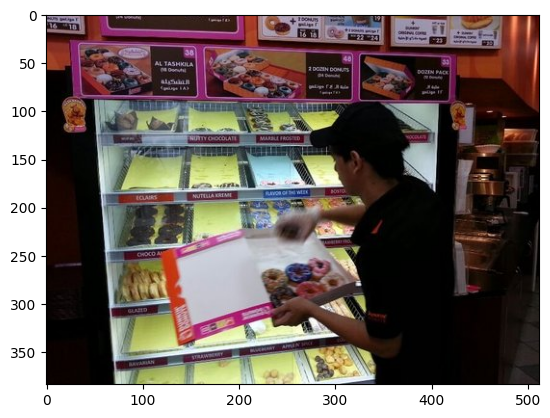

In [45]:
plt.imshow(imread('/content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data/training/donuts/3089053.jpg'))

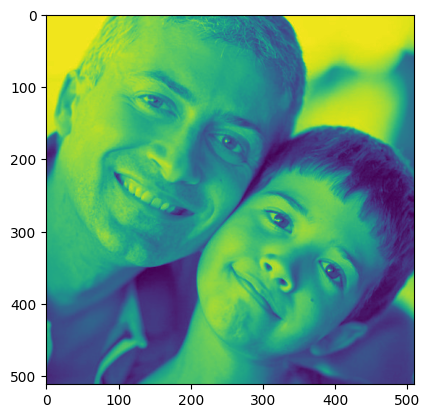

In [46]:
plt.imshow(imread('/content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data/training/steak/1340977.jpg'))

This is a black and white colour and not 3 channel

In [47]:
img_steak_2dim= imread('/content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data/training/steak/1340977.jpg')
img_steak_2dim.shape


(512, 510)

In [97]:
img_steak_dim1=[]
img_steak_dim2=[]

for image_filename in train_steak_img_list:
  img_steak2 = imread(train_path +'steak/'+image_filename)
  if (len(img_steak2.shape) > 2):
    #shape3=shape3+1
    d1, d2, color = img_steak2.shape
  else:
    #img_steak2_2dim=train_path+'steak/'+filename
    #shape2=shape2+1
    d1, d2,  = img_steak2.shape
  img_steak_dim1.append(d1)
  img_steak_dim2.append(d2)

KeyboardInterrupt: ignored

In [38]:
print(np.mean(img_steak_dim1))
print(np.mean(img_steak_dim2))

470.1457142857143
500.0314285714286


In [48]:
#print(img_steak2)

#OVERRAL TRAININING SET AVERAGE FOR DIM1 AND DIM2

DIM1 = (484.39428571428573 + 472.68142857142857 + 472.01 + 477.54285714285714 + 470.1457142857143)/5
DIM2 = (489.30571428571426 + 491.8985714285714 + 491.7342857142857 + 498.28285714285715 + 500.0314285714286)/5
print ("Overall Average for Dim1 :",DIM1 )
print ("Overall Average for Dim1 :",DIM2 )

Overall Average for Dim1 : 475.35485714285716
Overall Average for Dim1 : 494.2505714285714


In [49]:
imread('/content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data/training/steak/1340977.jpg').shape

(512, 510)

In [50]:
imread('/content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data/training/onion_rings/2889875.jpg').shape

(512, 512, 3)

In [51]:
imread('/content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data/training/donuts/3089053.jpg').shape

(384, 512, 3)

In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [54]:
image_gen=ImageDataGenerator(rotation_range=20,
                             width_shift_range=0.10,
                             height_shift_range=0.10,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             fill_mode='nearest',
                             rescale=1./255)     ## better to use 1.

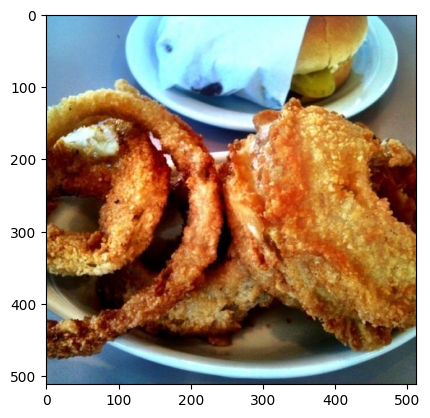

In [55]:
train_onion_rings_food   = train_path+'onion_rings/'+train_onion_rings_img_list[10]
plt.imshow(imread(train_onion_rings_food))

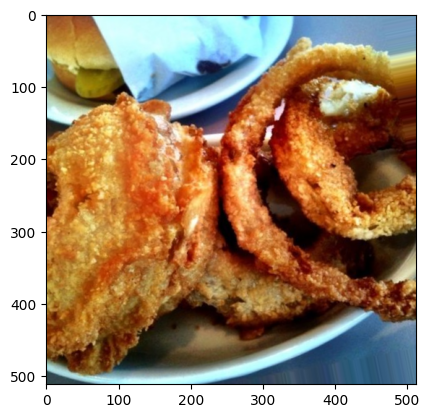

In [56]:
plt.imshow( image_gen.random_transform(imread(train_onion_rings_food)))

In [57]:
image_gen.random_transform(imread(train_onion_rings_food))

array([[[135,  77,  37],
        [138,  79,  37],
        [141,  82,  40],
        ...,
        [114, 157, 192],
        [114, 157, 192],
        [114, 157, 192]],

       [[135,  77,  37],
        [138,  79,  37],
        [141,  82,  40],
        ...,
        [116, 156, 191],
        [116, 156, 191],
        [116, 156, 191]],

       [[134,  77,  37],
        [137,  78,  37],
        [140,  81,  39],
        ...,
        [116, 156, 191],
        [116, 156, 191],
        [116, 156, 191]],

       ...,

       [[ 50,  73,  73],
        [ 49,  72,  72],
        [ 49,  71,  72],
        ...,
        [ 84, 120, 152],
        [ 83, 119, 151],
        [ 84, 120, 152]],

       [[ 52,  74,  73],
        [ 51,  73,  72],
        [ 52,  73,  73],
        ...,
        [ 85, 121, 153],
        [ 83, 119, 151],
        [ 84, 120, 152]],

       [[ 52,  74,  73],
        [ 52,  74,  72],
        [ 52,  74,  72],
        ...,
        [ 85, 121, 153],
        [ 83, 119, 151],
        [ 84, 120, 152]]

In [58]:
image_gen.flow_from_directory(train_path)

Found 3500 images belonging to 5 classes.


In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D


In [61]:
image_shape=(475,494,3)


In [ ]:
#  MODEL 1

# model=Sequential()
# model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())

# model.add(Dense(128))
# model.add(Activation('relu'))

# model.add(Dropout(0.25))

# model.add(Dense(5))
# model.add(Activation('softmax'))

# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','BinaryAccuracy'])

In [63]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','BinaryAccuracy'])

In [64]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 473, 492, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 236, 246, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 234, 244, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 117, 122, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 115, 120, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 57, 60, 64)       

In [65]:
batch_size=35

In [66]:
train_image_gen= image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')


Found 3500 images belonging to 5 classes.


In [67]:
val_image_gen= image_gen.flow_from_directory(val_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)

Found 1000 images belonging to 5 classes.


In [68]:
test_image_gen= image_gen.flow_from_directory( test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)

Found 500 images belonging to 5 classes.


In [69]:
train_image_gen.class_indices

{'donuts': 0, 'onion_rings': 1, 'pizza': 2, 'spring_rolls': 3, 'steak': 4}

In [70]:
val_image_gen.class_indices

{'donuts': 0, 'onion_rings': 1, 'pizza': 2, 'spring_rolls': 3, 'steak': 4}

In [71]:
test_image_gen.class_indices

{'donuts': 0, 'onion_rings': 1, 'pizza': 2, 'spring_rolls': 3, 'steak': 4}

In [72]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss', patience=13)

In [62]:
#result = model.fit(train_image_gen, batch_size=batch_size , epochs=5, validation_data=val_image_gen, callbacks=[early_stop])

In [75]:
result = model.fit(train_image_gen, batch_size=batch_size , epochs=10, validation_data=val_image_gen, callbacks=[early_stop])

Epoch 1/10
350/350 [==============================] - 2163s 6s/step - loss: 1.5938 - accuracy: 0.2471 - binary_accuracy: 0.8001 - val_loss: 1.5111 - val_accuracy: 0.3470 - val_binary_accuracy: 0.8044
Epoch 2/10
350/350 [==============================] - 210s 600ms/step - loss: 1.4872 - accuracy: 0.3371 - binary_accuracy: 0.8028 - val_loss: 1.4782 - val_accuracy: 0.3490 - val_binary_accuracy: 0.8036
Epoch 3/10
350/350 [==============================] - 208s 594ms/step - loss: 1.3931 - accuracy: 0.4171 - binary_accuracy: 0.8086 - val_loss: 1.3365 - val_accuracy: 0.4210 - val_binary_accuracy: 0.8112
Epoch 4/10
350/350 [==============================] - 203s 581ms/step - loss: 1.3248 - accuracy: 0.4523 - binary_accuracy: 0.8134 - val_loss: 1.3133 - val_accuracy: 0.4540 - val_binary_accuracy: 0.8154
Epoch 5/10
350/350 [==============================] - 207s 593ms/step - loss: 1.2350 - accuracy: 0.5129 - binary_accuracy: 0.8245 - val_loss: 1.1466 - val_accuracy: 0.5460 - val_binary_accuracy:

In [76]:
training_hist2=pd.DataFrame(result.history)

In [78]:
training_hist2

loss  accuracy  binary_accuracy  val_loss  val_accuracy  \
0  1.593755  0.247143         0.800114  1.511103         0.347   
1  1.487201  0.337143         0.802800  1.478231         0.349   
2  1.393074  0.417143         0.808629  1.336517         0.421   
3  1.324768  0.452286         0.813371  1.313287         0.454   
4  1.235009  0.512857         0.824457  1.146627         0.546   
5  1.140026  0.565429         0.839486  1.066955         0.606   
6  1.102934  0.571714         0.843257  1.081573         0.579   
7  1.040740  0.608000         0.852286  0.996316         0.614   
8  1.007484  0.621143         0.858057  1.025376         0.615   
9  0.994446  0.632286         0.860629  0.981780         0.630   

   val_binary_accuracy  
0               0.8044  
1               0.8036  
2               0.8112  
3               0.8154  
4               0.8390  
5               0.8454  
6               0.8446  
7               0.8604  
8               0.8518  
9               0.8638

In [79]:
result = model.fit(train_image_gen, batch_size=batch_size , epochs=25, validation_data=val_image_gen, callbacks=[early_stop])
training_hist3=pd.DataFrame(result.history)
training_hist3

Epoch 1/25
350/350 [==============================] - 208s 596ms/step - loss: 0.9619 - accuracy: 0.6391 - binary_accuracy: 0.8624 - val_loss: 0.9478 - val_accuracy: 0.6410 - val_binary_accuracy: 0.8656
Epoch 2/25
350/350 [==============================] - 209s 597ms/step - loss: 0.9545 - accuracy: 0.6414 - binary_accuracy: 0.8619 - val_loss: 0.9188 - val_accuracy: 0.6390 - val_binary_accuracy: 0.8674
Epoch 3/25
350/350 [==============================] - 204s 584ms/step - loss: 0.9353 - accuracy: 0.6457 - binary_accuracy: 0.8678 - val_loss: 0.9491 - val_accuracy: 0.6370 - val_binary_accuracy: 0.8658
Epoch 4/25
350/350 [==============================] - 205s 587ms/step - loss: 0.9190 - accuracy: 0.6640 - binary_accuracy: 0.8712 - val_loss: 0.9078 - val_accuracy: 0.6500 - val_binary_accuracy: 0.8722
Epoch 5/25
350/350 [==============================] - 203s 579ms/step - loss: 0.8955 - accuracy: 0.6600 - binary_accuracy: 0.8734 - val_loss: 0.9664 - val_accuracy: 0.6390 - val_binary_accurac

loss  accuracy  binary_accuracy  val_loss  val_accuracy  \
0   0.961875  0.639143         0.862400  0.947779         0.641   
1   0.954537  0.641429         0.861943  0.918827         0.639   
2   0.935291  0.645714         0.867829  0.949055         0.637   
3   0.919021  0.664000         0.871200  0.907783         0.650   
4   0.895494  0.660000         0.873371  0.966387         0.639   
5   0.886580  0.666286         0.873486  1.090678         0.571   
6   0.886246  0.666571         0.874971  0.986277         0.623   
7   0.864593  0.680857         0.879429  0.857224         0.678   
8   0.845514  0.687143         0.881486  0.868140         0.681   
9   0.815573  0.691714         0.883257  0.855544         0.674   
10  0.811734  0.687714         0.884343  0.954851         0.640   
11  0.826329  0.692571         0.882971  0.814087         0.695   
12  0.791527  0.704286         0.886057  0.894525         0.688   
13  0.800567  0.701143         0.885714  0.850947         0.700   
14  0.771626  0.706286         0.891086  0.828866         0.691   
15  0.750137  0.726286         0.894057  0.839644         0.685   
16  0.763278  0.712000         0.891314  0.887318         0.688   

    val_binary_accuracy  
0                0.8656  
1                0.8674  
2                0.8658  
3                0.8722  
4                0.8598  
5                0.8462  
6                0.8598  
7                0.8770  
8                0.8804  
9                0.8758  
10               0.8666  
11               0.8854  
12               0.8790  
13               0.8844  
14               0.8866  
15               0.8790  
16               0.8824

In [80]:
training_hist3

loss  accuracy  binary_accuracy  val_loss  val_accuracy  \
0   0.961875  0.639143         0.862400  0.947779         0.641   
1   0.954537  0.641429         0.861943  0.918827         0.639   
2   0.935291  0.645714         0.867829  0.949055         0.637   
3   0.919021  0.664000         0.871200  0.907783         0.650   
4   0.895494  0.660000         0.873371  0.966387         0.639   
5   0.886580  0.666286         0.873486  1.090678         0.571   
6   0.886246  0.666571         0.874971  0.986277         0.623   
7   0.864593  0.680857         0.879429  0.857224         0.678   
8   0.845514  0.687143         0.881486  0.868140         0.681   
9   0.815573  0.691714         0.883257  0.855544         0.674   
10  0.811734  0.687714         0.884343  0.954851         0.640   
11  0.826329  0.692571         0.882971  0.814087         0.695   
12  0.791527  0.704286         0.886057  0.894525         0.688   
13  0.800567  0.701143         0.885714  0.850947         0.700   
14  0.771626  0.706286         0.891086  0.828866         0.691   
15  0.750137  0.726286         0.894057  0.839644         0.685   
16  0.763278  0.712000         0.891314  0.887318         0.688   

    val_binary_accuracy  
0                0.8656  
1                0.8674  
2                0.8658  
3                0.8722  
4                0.8598  
5                0.8462  
6                0.8598  
7                0.8770  
8                0.8804  
9                0.8758  
10               0.8666  
11               0.8854  
12               0.8790  
13               0.8844  
14               0.8866  
15               0.8790  
16               0.8824

<Axes: >

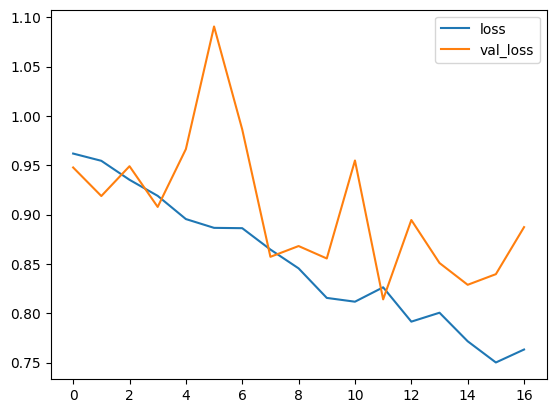

In [81]:
training_hist3[['loss', 'val_loss']].plot()

<Axes: >

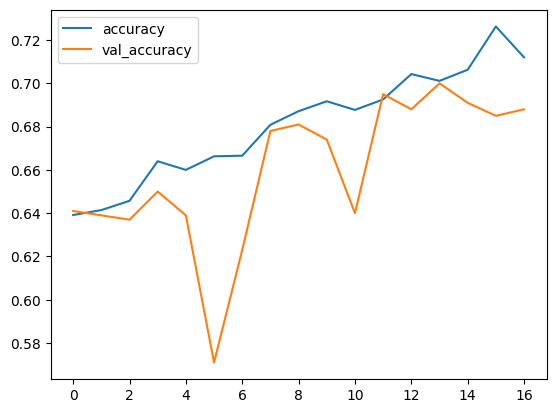

In [82]:
training_hist3[['accuracy', 'val_accuracy']].plot()

In [83]:
model.metrics_names

['loss', 'accuracy', 'binary_accuracy']

In [84]:
model.evaluate_generator(val_image_gen)

<ipython-input-84-632349700bb4>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(val_image_gen)


[0.9035382270812988, 0.6740000247955322, 0.878000020980835]

In [85]:
model.fit(val_image_gen)

100/100 [==============================] - 46s 455ms/step - loss: 0.9784 - accuracy: 0.6480 - binary_accuracy: 0.8622


In [87]:
pred_prob=model.predict(val_image_gen)

100/100 [==============================] - 47s 471ms/step


In [115]:
pred_prob[51]

array([0.17568661, 0.24603567, 0.03741714, 0.368122  , 0.17273864],
      dtype=float32)

In [116]:
np.argmax(pred_prob[51])

3

In [120]:
max(pred_prob[50])
#pred_prob[50].index(max(pred_prob[50]))
#np.argmax(pred_prob)
# animals = ['cat', 'dog', 'rabbit', 'horse']

# # get the index of 'dog'
# index = animals.index('dog')

0.49534348

In [107]:
val_image_gen.classes[33]

0

In [90]:
val_image_gen.class_indices

{'donuts': 0, 'onion_rings': 1, 'pizza': 2, 'spring_rolls': 3, 'steak': 4}

In [88]:
val_image_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [97]:
print(np.round(pred_prob, 2))

[[0.2  0.21 0.27 0.11 0.22]
 [0.93 0.   0.01 0.   0.06]
 [0.11 0.06 0.02 0.79 0.01]
 ...
 [0.2  0.2  0.07 0.22 0.31]
 [0.32 0.01 0.07 0.02 0.58]
 [0.23 0.   0.06 0.01 0.7 ]]


In [118]:
#pred=pred_prob > 0.5
np.argmax(pred_prob,axis=1)

array([2, 0, 3, 4, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2,
       0, 0, 0, 4, 0, 0, 0, 3, 0, 0, 3, 0, 1, 0, 3, 0, 3, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 3, 3, 0, 0, 0, 0, 0, 1, 0,
       0, 2, 4, 0, 0, 0, 2, 0, 0, 3, 4, 0, 0, 1, 0, 0, 3, 0, 0, 2, 0, 0,
       0, 0, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0,
       1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 4, 0, 0, 3,
       2, 0, 1, 2, 1, 2, 1, 0, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 0, 0, 1,
       2, 2, 1, 1, 0, 1, 1, 2, 1, 0, 2, 1, 4, 1, 1, 2, 3, 2, 1, 1, 3, 1,
       1, 0, 0, 1, 0, 1, 1, 2, 3, 1, 1, 1, 0, 2, 2, 3, 4, 1, 1, 2, 1, 1,
       1, 1, 1, 3, 0, 1, 1, 2, 2, 0, 1, 0, 3, 2, 1, 2, 3, 2, 2, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [168]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [119]:
print(classification_report(val_image_gen.classes, np.argmax(pred_prob,axis=1)))

              precision    recall  f1-score   support

           0       0.51      0.73      0.60       200
           1       0.71      0.52      0.60       200
           2       0.66      0.88      0.76       200
           3       0.67      0.45      0.53       200
           4       0.84      0.70      0.77       200

    accuracy                           0.66      1000
   macro avg       0.68      0.65      0.65      1000
weighted avg       0.68      0.66      0.65      1000



In [124]:
confusion_matrix(val_image_gen.classes, np.argmax(pred_prob,axis=1))

array([[147,   8,  15,  20,  10],
       [ 32, 103,  45,  16,   4],
       [ 18,   2, 176,   1,   3],
       [ 55,  31,  16,  89,   9],
       [ 39,   1,  13,   7, 140]])

EXPERIMENTING WITH MORE MODEL **OPTIMIZATION**

In [145]:
result = model.fit(train_image_gen, batch_size=batch_size , epochs=50, validation_data=val_image_gen, callbacks=[early_stop])
training_hist4=pd.DataFrame(result.history)
training_hist4

Epoch 1/50
100/100 [==============================] - 218s 2s/step - loss: 1.5560 - accuracy: 0.3217 - binary_accuracy: 0.7976 - val_loss: 1.5088 - val_accuracy: 0.3360 - val_binary_accuracy: 0.7940
Epoch 2/50
100/100 [==============================] - 213s 2s/step - loss: 1.3781 - accuracy: 0.4260 - binary_accuracy: 0.8094 - val_loss: 1.2691 - val_accuracy: 0.4750 - val_binary_accuracy: 0.8162
Epoch 3/50
100/100 [==============================] - 213s 2s/step - loss: 1.3030 - accuracy: 0.4777 - binary_accuracy: 0.8182 - val_loss: 1.2182 - val_accuracy: 0.4980 - val_binary_accuracy: 0.8270
Epoch 4/50
100/100 [==============================] - 213s 2s/step - loss: 1.2417 - accuracy: 0.5186 - binary_accuracy: 0.8279 - val_loss: 1.2186 - val_accuracy: 0.5230 - val_binary_accuracy: 0.8282
Epoch 5/50
100/100 [==============================] - 215s 2s/step - loss: 1.1507 - accuracy: 0.5506 - binary_accuracy: 0.8348 - val_loss: 1.0899 - val_accuracy: 0.5960 - val_binary_accuracy: 0.8468
Epoch

loss  accuracy  binary_accuracy  val_loss  val_accuracy  \
0   1.555973  0.321714         0.797600  1.508760         0.336   
1   1.378100  0.426000         0.809429  1.269134         0.475   
2   1.302973  0.477714         0.818171  1.218171         0.498   
3   1.241719  0.518571         0.827886  1.218578         0.523   
4   1.150724  0.550571         0.834800  1.089926         0.596   
5   1.078698  0.586857         0.846343  1.040596         0.615   
6   1.035111  0.600857         0.853086  1.030835         0.605   
7   1.005781  0.618857         0.856571  0.960897         0.632   
8   0.975558  0.631429         0.859543  0.926970         0.648   
9   0.959875  0.633714         0.863029  0.977858         0.642   
10  0.923702  0.650286         0.869257  0.847659         0.685   
11  0.881836  0.668571         0.873657  0.895831         0.672   
12  0.865684  0.678000         0.876857  0.842529         0.670   
13  0.843149  0.692571         0.880057  0.825175         0.695   
14  0.831256  0.682286         0.882114  0.837075         0.701   
15  0.811068  0.698857         0.885486  0.821730         0.693   
16  0.795166  0.705429         0.886514  0.852261         0.688   
17  0.796101  0.714000         0.889829  0.875035         0.677   
18  0.779285  0.707714         0.887543  0.885259         0.670   
19  0.769443  0.712571         0.889143  0.847507         0.700   
20  0.770998  0.714857         0.892114  0.852402         0.685   
21  0.740925  0.728571         0.894743  0.830352         0.688   
22  0.744074  0.718571         0.891829  0.782628         0.705   
23  0.708441  0.735143         0.900057  0.863493         0.676   
24  0.722079  0.736286         0.896743  0.808092         0.698   
25  0.694950  0.753143         0.902400  0.792458         0.716   
26  0.686464  0.750571         0.903771  0.759190         0.727   
27  0.679014  0.753714         0.904400  0.741975         0.725   
28  0.647180  0.762857         0.909143  0.784829         0.722   
29  0.658542  0.762857         0.908571  0.792834         0.717   
30  0.652687  0.758571         0.905886  0.752994         0.731   
31  0.617930  0.774000         0.912343  0.774535         0.721   
32  0.648789  0.769143         0.909543  0.743492         0.730   
33  0.613247  0.772000         0.913600  0.737201         0.738   
34  0.607432  0.769714         0.911600  0.740246         0.747   
35  0.588031  0.781714         0.916114  0.879197         0.702   
36  0.607065  0.773429         0.911886  0.770337         0.731   
37  0.610354  0.774571         0.912743  0.825562         0.711   
38  0.563664  0.793429         0.918514  0.782554         0.734   
39  0.571521  0.783714         0.916571  0.739685         0.727   
40  0.576468  0.778571         0.915829  0.788084         0.731   
41  0.577293  0.783429         0.914400  0.805988         0.710   
42  0.538872  0.802286         0.921714  0.914373         0.707   
43  0.550682  0.796000         0.922343  0.714465         0.743   
44  0.543594  0.806286         0.923943  0.782574         0.733   
45  0.530548  0.802286         0.925086  0.761399         0.739   
46  0.525167  0.806286         0.923371  0.722419         0.743   
47  0.533316  0.809143         0.926057  0.817730         0.718   
48  0.512554  0.805143         0.925429  0.854407         0.715   
49  0.482288  0.821143         0.930971  0.834673         0.734   

    val_binary_accuracy  
0                0.7940  
1                0.8162  
2                0.8270  
3                0.8282  
4                0.8468  
5                0.8508  
6                0.8520  
7                0.8668  
8                0.8698  
9                0.8684  
10               0.8776  
11               0.8786  
12               0.8802  
13               0.8858  
14               0.8824  
15               0.8860  
16               0.8846  
17               0.8740  
18               0.8756  
19               0.8868  
20               0.8804  
21               0

**GRAPHS OF LOSS AND VALIDATION LOSS AFTER TRAINING WITH MODEL **

<Axes: >

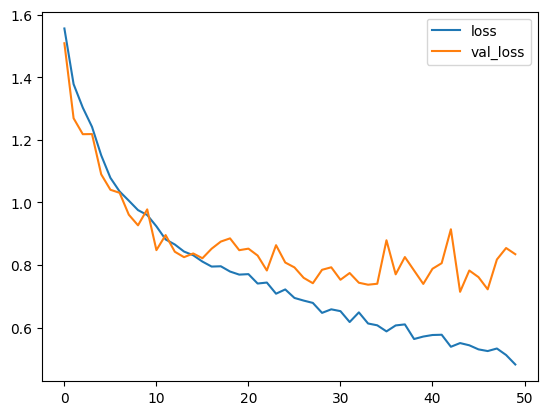

In [147]:
training_hist4[['loss', 'val_loss']].plot()
# training_hist3[['loss', 'val_loss']].plot()

**GRAPHS OF ACCURACY AND VALIDATION ACCURACY AFTER TRAINING WITH MODEL **

<Axes: >

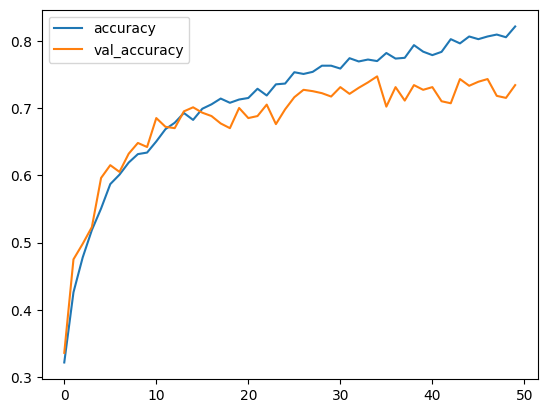

In [148]:
training_hist4[['accuracy', 'val_accuracy']].plot()

In [149]:
model.evaluate(val_image_gen)

29/29 [==============================] - 48s 2s/step - loss: 0.7997 - accuracy: 0.7330 - binary_accuracy: 0.9014


[0.7996957898139954, 0.7329999804496765, 0.9014000296592712]

In [150]:
model.save_weights('GoogleDrive/MyDrive/Final_DL_Project_Weight/')

In [74]:
model.load_weights('GoogleDrive/MyDrive/Final_DL_Project_Weight/')

In [75]:
pred_prob2=model.predict(val_image_gen)

29/29 [==============================] - 499s 18s/step


In [65]:
pred_prob2=model.predict(val_image_gen)

29/29 [==============================] - 382s 13s/step


In [152]:
np.argmax(pred_prob2,axis=1)

array([0, 4, 0, 0, 0, 2, 0, 1, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 4, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 2,
       0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 3, 0, 0, 1, 0, 0,
       0, 0, 0, 3, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 2, 3, 0, 1, 3, 0, 0, 0, 3, 1, 1, 2, 3, 0, 0, 0, 0, 1, 1, 4,
       0, 1, 0, 0, 0, 0, 2, 0, 0, 3, 4, 0, 0, 1, 0, 0, 1, 2, 0, 3, 0, 0,
       4, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 2, 2, 1, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 3, 0, 0, 1, 0, 0, 3, 0, 3, 0, 0, 3, 2, 4,
       1, 0, 1, 0, 1, 0, 3, 0, 0, 0, 0, 2, 2, 4, 0, 3, 2, 4, 4, 0, 3, 3,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 2, 3, 1, 3, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 3, 1, 3, 1, 1, 1, 1, 1,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,

**CLASSIFICATIOIN REPORT OF VALIDATION SETS**

In [153]:
print(classification_report(val_image_gen.classes, np.argmax(pred_prob2,axis=1)))

              precision    recall  f1-score   support

           0       0.72      0.59      0.65       200
           1       0.67      0.73      0.70       200
           2       0.73      0.89      0.80       200
           3       0.66      0.69      0.67       200
           4       0.87      0.71      0.78       200

    accuracy                           0.72      1000
   macro avg       0.73      0.72      0.72      1000
weighted avg       0.73      0.72      0.72      1000



In [69]:
print(classification_report(val_image_gen.classes, np.argmax(pred_prob2,axis=1)))  # After reloading saved weights

              precision    recall  f1-score   support

           0       0.71      0.60      0.65       200
           1       0.75      0.76      0.75       200
           2       0.76      0.91      0.83       200
           3       0.66      0.73      0.70       200
           4       0.89      0.73      0.80       200

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



In [166]:
np.argmax(pred_prob2,axis=1)

array([0, 4, 0, 0, 0, 2, 0, 1, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 4, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 2,
       0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 3, 0, 0, 1, 0, 0,
       0, 0, 0, 3, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 2, 3, 0, 1, 3, 0, 0, 0, 3, 1, 1, 2, 3, 0, 0, 0, 0, 1, 1, 4,
       0, 1, 0, 0, 0, 0, 2, 0, 0, 3, 4, 0, 0, 1, 0, 0, 1, 2, 0, 3, 0, 0,
       4, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 2, 2, 1, 0,
       0, 0, 0, 2, 0, 0, 2, 0, 3, 0, 0, 1, 0, 0, 3, 0, 3, 0, 0, 3, 2, 4,
       1, 0, 1, 0, 1, 0, 3, 0, 0, 0, 0, 2, 2, 4, 0, 3, 2, 4, 4, 0, 3, 3,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 2, 3, 1, 3, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 2, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 2, 3, 1, 3, 1, 1, 1, 1, 1,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,

**CONFUSSION MATRIX OF VALIDATION SETS**

In [169]:
confusion_matrix(val_image_gen.classes, np.argmax(pred_prob2,axis=1))

array([[119,  25,  23,  21,  12],
       [ 12, 147,  11,  29,   1],
       [  7,   8, 177,   5,   3],
       [ 15,  34,   8, 137,   6],
       [ 13,   7,  23,  15, 142]])

In [70]:
confusion_matrix(val_image_gen.classes, np.argmax(pred_prob2,axis=1))   #After reloading saved model weight

array([[120,  24,  19,  28,   9],
       [ 13, 152,   9,  25,   1],
       [  8,   4, 182,   4,   2],
       [ 17,  21,   9, 147,   6],
       [ 12,   3,  20,  19, 146]])

In [170]:
confusion_matrix2=confusion_matrix(val_image_gen.classes, np.argmax(pred_prob2,axis=1))

<Axes: >

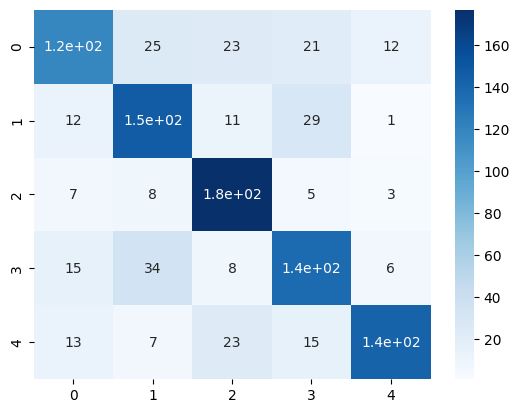

In [171]:
sns.heatmap(confusion_matrix2, annot=True, cmap='Blues')

**TEST DATA CHECKS**

In [72]:
from tensorflow.keras.preprocessing import image

In [84]:
test_spring_rollsg_food = test_path+'springs_rollsg/'+test_spring_rollsg_img_list[10]
test_spring_rollsg_food

'/content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data/test/springs_rollsg/383155.jpg'

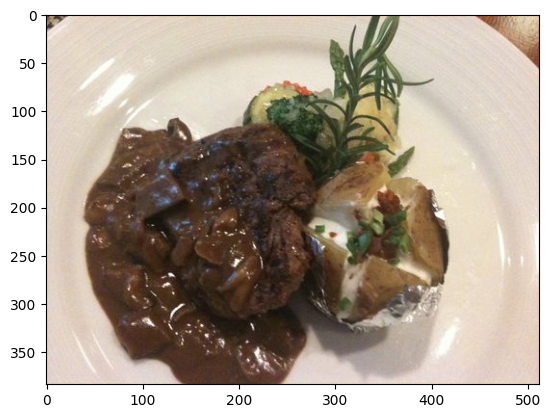

In [81]:
#test_img = image.load_img(test_spring_rollsg_food, target_size=image_shape)
plt.imshow(imread(test_path+'steak/' + test_steak_img_list[2]))

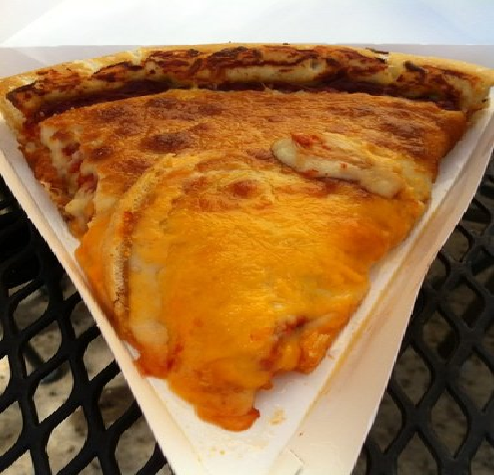

In [92]:
test_img = image.load_img('/content/GoogleDrive/MyDrive/Colab Notebooks/DL_Final_Project/final_project_data/test/pizza/317861.jpg', target_size=image_shape)
test_img

In [95]:
type(test_img)


PIL.Image.Image

In [99]:
test_img_arr=image.img_to_array(test_img)
test_img_arr.shape


(475, 494, 3)

**CONFUSSION MATRIX OF TEST SETS**

In [77]:
pred_test=model.predict(test_image_gen)

15/15 [==============================] - 238s 17s/step


In [78]:
confusion_matrix(test_image_gen.classes, np.argmax(pred_test,axis=1))

array([[61,  9, 11, 11,  8],
       [ 7, 68,  8, 15,  2],
       [ 6,  0, 87,  5,  2],
       [14, 15,  5, 62,  4],
       [ 5,  4,  7,  8, 76]])

<Axes: >

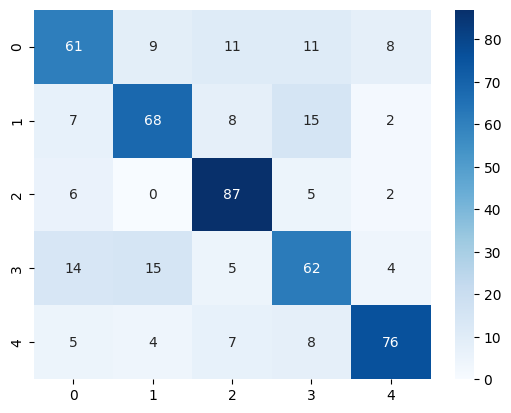

In [83]:
confusion_matrix_test=confusion_matrix(test_image_gen.classes, np.argmax(pred_test,axis=1))
sns.heatmap(confusion_matrix_test, annot=True, cmap='Blues')

**CLASSIFICATION REPORT OF TEST DATASETS**

In [82]:
print(classification_report(test_image_gen.classes, np.argmax(pred_test,axis=1)))  # After reloading saved weights

              precision    recall  f1-score   support

           0       0.66      0.61      0.63       100
           1       0.71      0.68      0.69       100
           2       0.74      0.87      0.80       100
           3       0.61      0.62      0.62       100
           4       0.83      0.76      0.79       100

    accuracy                           0.71       500
   macro avg       0.71      0.71      0.71       500
weighted avg       0.71      0.71      0.71       500



################## TRAINING WITH ANOTHER MODEL TO SEEK IMPROVEMENT ############

In [84]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.25))

model.add(Dense(5))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy','BinaryAccuracy'])

In [85]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 473, 492, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 236, 246, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 234, 244, 32)      9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 117, 122, 32)      0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 456768)            0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [89]:
result_mod2 = model.fit(train_image_gen, batch_size=batch_size , epochs=30, validation_data=val_image_gen, callbacks=[early_stop])
training_mod2=pd.DataFrame(result_mod2.history)
training_mod2

Epoch 1/30
100/100 [==============================] - 230s 2s/step - loss: 1.0336 - accuracy: 0.6103 - binary_accuracy: 0.8513 - val_loss: 1.0640 - val_accuracy: 0.5900 - val_binary_accuracy: 0.8498
Epoch 2/30
100/100 [==============================] - 235s 2s/step - loss: 1.0085 - accuracy: 0.6171 - binary_accuracy: 0.8546 - val_loss: 1.1044 - val_accuracy: 0.5730 - val_binary_accuracy: 0.8434
Epoch 3/30
100/100 [==============================] - 237s 2s/step - loss: 1.0005 - accuracy: 0.6089 - binary_accuracy: 0.8565 - val_loss: 1.0485 - val_accuracy: 0.6070 - val_binary_accuracy: 0.8542
Epoch 4/30
100/100 [==============================] - 233s 2s/step - loss: 0.9935 - accuracy: 0.6211 - binary_accuracy: 0.8566 - val_loss: 0.9692 - val_accuracy: 0.6280 - val_binary_accuracy: 0.8612
Epoch 5/30
100/100 [==============================] - 228s 2s/step - loss: 0.9540 - accuracy: 0.6411 - binary_accuracy: 0.8642 - val_loss: 0.9912 - val_accuracy: 0.6270 - val_binary_accuracy: 0.8622
Epoch

UnknownError: ignored

In [88]:
training_mod2=pd.DataFrame(result_mod2.history)
training_mod2

loss  accuracy  binary_accuracy  val_loss  val_accuracy  \
0   2.704912  0.312571         0.792343  1.420652         0.391   
1   1.412305  0.414000         0.807600  1.364064         0.444   
2   1.355209  0.452857         0.813371  1.275539         0.491   
3   1.325623  0.464286         0.817771  1.224021         0.524   
4   1.268066  0.495429         0.822629  1.268927         0.502   
5   1.246183  0.503429         0.825257  1.185991         0.530   
6   1.220602  0.516000         0.829143  1.185105         0.532   
7   1.201347  0.536000         0.828800  1.134214         0.555   
8   1.197574  0.530857         0.830857  1.129146         0.553   
9   1.162349  0.542286         0.835943  1.131440         0.539   
10  1.134861  0.553429         0.837371  1.099668         0.572   
11  1.106112  0.570286         0.843200  1.057681         0.578   
12  1.086113  0.572857         0.843714  1.146854         0.553   
13  1.068966  0.590286         0.845771  1.029974         0.594   
14  1.095578  0.580571         0.844743  1.047592         0.583   

    val_binary_accuracy  
0                0.8082  
1                0.8126  
2                0.8184  
3                0.8252  
4                0.8178  
5                0.8332  
6                0.8336  
7                0.8386  
8                0.8376  
9                0.8346  
10               0.8418  
11               0.8462  
12               0.8380  
13               0.8512  
14               0.8490